# Comparison of Running Time Distributions
* Team: Jonathan Tan, Lance Dacy, Reannan Mcdaniel, Shawn Jung 
* Last Update: 5/31/2020 
* We will visually compare if the empiricial cdf(cumulative distribution function) of each year is different. And then, we will apply KL(Kullback-Leibler) divergence to quantify the difference. The article below was helpful as we implement the function. <BR>
https://towardsdatascience.com/kl-divergence-python-example-b87069e4b810

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import datetime as dt
import cycler 
%matplotlib inline

In [2]:
df = pd.read_csv('12yearsdata.csv')

In [3]:
df.head()

,Unnamed: 0,Race,Name,Age,Time,Pace,PiS.TiS,Division,PiD.TiD,Hometown
0,1,1999 10M,Jane Omoro (W),26,0:53:37,5:22,Jan-58,W2529,1/559,Kenya
1,2,1999 10M,Jane Ngotho (W),29,0:53:38,5:22,Feb-58,W2529,2/559,Kenya
2,3,1999 10M,Lidiya Grigoryeva (W),NR,0:53:40,5:22,Mar-58,NR,NR,Russia
3,4,1999 10M,Eunice Sagero (W),20,0:53:55,5:24,Apr-58,W2024,1/196,Kenya
4,5,1999 10M,Alla Zhilyayeva (W),29,0:54:08,5:25,May-58,W2529,3/559,Russia


We define 'Year' and 'Seconds(total running time)' as separate columns

In [4]:
df['Year'] = df['Race'].str.split(' ', expand=True)[0]
df['Seconds'] = (pd.to_datetime(df['Time'], format='%H:%M:%S') - dt.datetime(1900,1,1)).dt.total_seconds()
years = list(df['Year'].unique())

# define a dataframe to hold ecdf per each year
ecdfs = pd.DataFrame()

Visual plot of empirical CDF shows the running time of mid-range runners are increasing over time. For instance, the running time of 50th female participants increased from 5,705 to 5,882 during 1999 to 2012 period

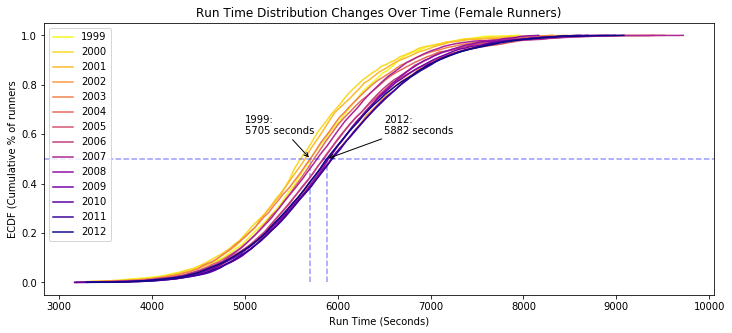

In [28]:
fig, ax = plt.subplots(figsize=(12,5))
plt.rcParams["axes.prop_cycle"] = cycler.cycler('color',plt.cm.plasma_r(np.linspace(0,1,14))) 

for year in years:
    temp = df[df['Year'] == year]['Seconds']
    counts, bin_edges = np.histogram(temp, bins=100, normed=True)
    cdf = np.cumsum(counts)
    ecdfs[year] = cdf/cdf[-1]
    ax.plot(bin_edges[1:], cdf/cdf[-1], label=year)

    if (year == '1999'):
        plt.annotate(year + ':\n' + str(np.int(temp.median())) + ' seconds', xy=(temp.median(), 0.5), xytext=(5000, 0.6), arrowprops=dict(arrowstyle="->"))
        plt.vlines(temp.median(), 0, 0.5, color = 'b', linestyle = '--', alpha=0.4)
    if (year == '2012'):
        plt.annotate(year + ':\n' + str(np.int(temp.median())) + ' seconds', xy=(temp.median(), 0.5), xytext=(6500, 0.6), arrowprops=dict(arrowstyle="->"))
        plt.vlines(temp.median(), 0, 0.5, color = 'b', linestyle = '--', alpha=0.4)
    
ax.axhline(0.5, color='b', linestyle='--', alpha=0.4)
ax.set_title('Run Time Distribution Changes Over Time (Female Runners)')
ax.set_xlabel('Run Time (Seconds)')
ax.set_ylabel('ECDF (Cumulative % of runners')
plt.legend()
plt.show()

Let's compare the difference in quantatively by measuring KL divergece of each year to that of 1999

In [6]:
def kl_divergence(p, q):
    ''' This function compare two arrays(discrete probability distributions) and return the divergence'''
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

In [26]:
kld = [] 

for year in years:
    kld.append(round(kl_divergence(ecdfs[year], ecdfs['1999']),4)) 

We can see that the KL Divergence of the year 2007 is the highest(15.4706) and the next year, 2008 is the lowest(-1.5351). So, we are curious if the distribution of 2007 is the most different to that of 1999, while 2008 distribution shows similar patternm

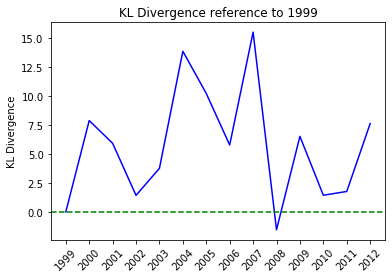

In [27]:
plt.title('KL Divergence reference to 1999')
plt.plot(kld, c='b')
plt.xticks(np.arange(14), years, rotation=45)
plt.axhline(0, c='green', linestyle='--')
plt.ylabel('KL Divergence')
plt.show()

In [30]:
print('KL Divergence of 2007:', kld[8])
print('KL Divergence of 2008:', kld[9])

KL Divergence of 2002: 1.4267
KL Divergence of 2007: 15.4706
KL Divergence of 2008: -1.5351


It turns out, we had lots of slow-runners in 2007 compared to 2008. In this regard, the distribution of 1999 and 2008 is similar as the tails are not long 

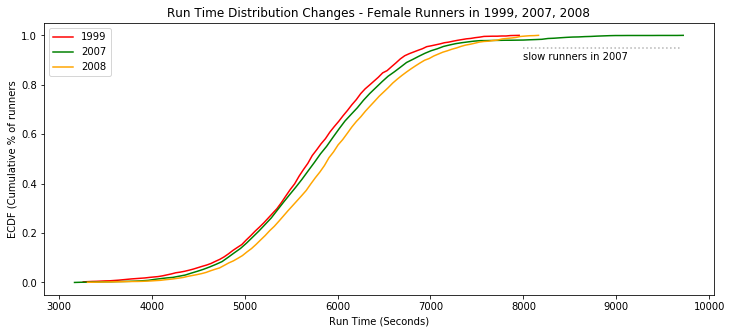

In [67]:
fig, ax = plt.subplots(figsize=(12,5))
#plt.rcParams["axes.prop_cycle"] = cycler.cycler('color',plt.cm.Accent(np.linspace(0,1,14))) 
plt.rcParams["axes.prop_cycle"] = cycler.cycler('color', ['red', 'green', 'orange', 'black'])

for year in ['1999', '2007', '2008']:
    temp = df[df['Year'] == year]['Seconds']
    counts, bin_edges = np.histogram(temp, bins=100, normed=True)
    cdf = np.cumsum(counts)
    ax.plot(bin_edges[1:], cdf/cdf[-1], label=year)

ax.hlines(0.95, 8000, 9700, linestyle='dotted', alpha=0.3)
ax.text(8000, 0.9, 'slow runners in 2007')
ax.set_title('Run Time Distribution Changes - Female Runners in 1999, 2007, 2008')
ax.set_xlabel('Run Time (Seconds)')
ax.set_ylabel('ECDF (Cumulative % of runners')
plt.legend()
plt.show()

The same finding can be confirmed from the box plots. We can see we have the longest slow running outliers in 2007, while that of 2008 is similar to 1999

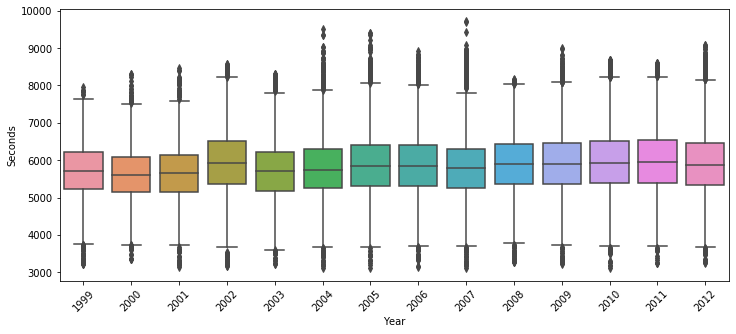

In [72]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x='Year', y='Seconds', data=df)
plt.xticks(rotation=45)
plt.show()